# **CAPSTONE PROJECT MODULE 2: ANALISIS TRANSJAKARTA PADA APRIL 2023**
### **Ditulis oleh Andreas Hoffman Parulian**

## **INTRODUKSI**

TransJakarta merupakan transportasi umum berbasis Bus Rapid Transit (BRT) yang beroperasi pada rute total 251,2 km di sekitar Jakarta dan sekitarnya, dalam kasus ini Jabodetabek. Angka tersebut menunjukkan bahwa Transjakarta dapat diumumkan sebagai sistem BRT terpanjang di dunia. 

Beroperasi mulai dari tahun 2004, TransJakarta melayani sebanyak 1.1 juta pelanggan per hari. TransJakarta telah berkolaborasi dengan banyak bank untuk transaksi cashless, mempermudah persiapan pelanggan untuk menggunakan bus selanjutnya. Berawal dari melayani dari jam 05:00-20:00, sekarang sudah melayani 24 jam.

Golongan bus pada TransJakarta umumnya dibagi menjadi tiga, yakni JakLingko yang disebut sebagai bus gratis, TransJakarta sebagai model standar, serta RoyalTrans dengan harga tertinggi dan fasilitas paling tinggi.

Tim khusus data dibentuk untuk melakukan studi data yang diperoleh dari laporan Transjakarta, dengan data mencakup sebanyak 37.900 transaksi pada periode April 2023 untuk menanggulangi masalah-masalah yang akan disebutkan.

## **PERNYATAAN MASALAH**


TransJakarta ingin mengetahui jumlah serta proporsi transaksi berdasarkan lalu lintas dari berbagai sudut: halte, koridor, gender, usia, serta situasi jam puncak pada hari kerja serta akhir pekan.

Terlepas dari nilai plusnya, terdapat banyak kendala yang Transjakarta hadapi, sebagai contoh keterlambatan jadwal pada bus TransJakarta yang membuat pelanggan menunggu lebih lama, atau bahkan kejadian yang membuat pelanggan perempuan merasa tidak nyaman atau aman. Dari segi usia, pelayanan lebih terfokus pada kelompok umur dewasa, dan pelanggan pada kelompok remaja serta lansia merasa tidak diperhatikan, termasuk para penyandang disabilitas.


Untuk meningkatkan pelayanan serta mengembalikan kepercayaan pelanggan dalam penggunaan TransJakarta, berikut sejumlah pertanyaan yang akan dijawab dari perspektif data scientist:
- Halte dan Koridor manakah yang lebih sering digunakan pada periode April 2023?
- Gender manakah yang lebih sering menggunakan TransJakarta?
- Bagaimanakah situasi penggunaan TransJakarta berdasarkan usia?
- Jika mayoritas gender adalah Wanita, koridor manakah yang sebaiknya dipilih untuk menunjang Wanita?
- Koridor dan halte manakah yang terbaik untuk menunjang pelanggan Lansia?
- Koridor manakah yang paling sering digunakan saat Peak Hours (Jam Sibuk) pada Hari Kerja?




## **TUJUAN PENELITIAN INI**

Penelitian ini ditujukan untuk menentukan course of action untuk menanggulangi sejumlah masalah yang disebutkan terjadi di TransJakarta secara internal maupun eksternal. Berikut merupakan tujuan penelitian ini: 

- Mengamati aktivitas tertinggi dari segi halte dan koridor
- Mengamati proporsi penggunaan TransJakarta per Gender, khususnya pada perhentian yang lebih sering digunakan Perempuan
- Mengamati transaksi berdasarkan Golongan Usia, serta memfasilitasi halte kepada para pelanggan dengan kelompok usia Lansia
- Melihat perhentian yang paling sering digunakan saat Peak Hours pada Hari Kerja

## **DATA**

Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang dikumpulkan oleh TransJakarta. Link dataset dapat dilihat di [sini](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction).

In [685]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, time
import missingno



# from scipy.stats import shapiro, kstest
# from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, f_oneway
# from scipy.stats import mannwhitneyu, kruskal, wilcoxon, normaltest

### **DATA DICTIONARY**

Dari dataset yang telah ditampilkan, berikut merupakan 22 buah kolom beserta deskripsinya:

|**No.** | **Kolom** | **Deskripsi** |
| --- | --- | --- |
| 1. | transID| ID sebuah transaksi, bersifat unique |
| 2. | payCardID |ID untuk kartu TransJakarta |
| 3. | payCardBank |nama bank yang diasosiasikan pada kartu TransJakarta |
| 4. | payCardName |nama pengguna kartu TransJakarta |
| 5. | payCardSex |jenis kelamin pengguna kartu TransJakarta |
| 6. | payCardBirthDate | tanggal, lebih tepatnya tahun lahir pengguna kartu TransJakarta |
| 7. | corridorID | ID jurusan TransJakarta untuk pengelompokan rute, bersifat unique |
| 8. | corridorName| nama jurusan TransJakarta |
| 9. | direction | arah sebuah jurusan (dinotasikan 0 dan 1 sebagai masing-masing arah pulang dan pergi)|
| 10. | tapInStops | kode perhentian saat tap-in |
| 11. | tapInStopsName | nama perhentian saat tap-in |
| 12. | tapInStopsLat| lintang perhentian saat tap-in. Negatif menandakan selatan, sementara Positif menandakan utara |
| 13. | tapInStopsLon | bujur perhentian saat tap-in |
| 14. | stopStartSeq | Urutan perhentian seperti contoh perhentian 1, 2 dan seterusnya. berkaitan dengan arah (direction) |
| 15. | tapInTime | waktu saat tap-in |
| 16. | tapOutStops | kode perhentian saat tap-out |
| 17. | tapOutStopsName | nama perhentian saat tap-out |
| 18. | tapOutStopsLat | lintang perhentian saat tap-out. Negatif menandakan selatan, sementara Positif menandakan utara |
| 19. | tapOutStopsLon | bujur perhentian saat tap-out |
| 20. | stopEndSeq | urutan perhentian, seperti contoh, perhentian 1, 2 dan seterusnya. berkaitan dengan arah (direction) |
| 21. | tapOutTime | waktu tap-out, beserta tanggal dan waktu |
| 22. | payAmount | jumlah yang dibayar saat melakukan tapOut. payAmount dapat digunakan untuk mengidentifikasi jenis bus TransJakarta yang digunakan: 0 untuk bus Jak-Lingko, 3500 untuk bus non-Jak-Lingko, dan 20000 untuk bus RoyalTrans |




In [686]:
tj = pd.DataFrame(pd.read_csv('Transjakarta.csv'))
tj

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


## **DATA UNDERSTANDING**

Dalam proses ini, kita akan mengetahui apa saja yang terdapat di dalam dataset sebagai bahan pertimbangan dalam tahapan data cleaning.

### **DATA DESCRIPTION**


Hal pertama yang akan dilakukan adalah untuk menampilkan informasi pada data, beserta deskripsi data khusus untuk object karena mayoritas kolom pada table bertipe object.

In [687]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [688]:
tj.describe(include='object')

,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [689]:
tj.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


In [690]:
pd.set_option('display.max_colwidth', None)

itemList = []

for col in tj.columns:
    itemList.append([col, tj[col].nunique(), tj[col].unique()])

table1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'], data=itemList)

table1Desc


,Column Name,Number of Unique,Unique Values
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Berikut garis besarnya:

Dari describe yang memfokuskan pada object:
- Terdapat 6 jenis kartu Bank yang dipakai pada transaksi TransJakarta. Dan mayoritas pelanggan menggunakan kartu DKI.
- Koridor yang paling ramai dicapai oleh Cibubur - Balai Kota (1T). Sekalipun demikian, terdapat inkonsistensi freq pada `corridorID` dan `corridorName`, dapat disimpulkan terdapat data null. Missing values akan dijelaskan di bagian selanjutnya.
- Mayoritas pengguna adalah perempuan.
- Terdapat 216 nilai unik `corridorID` dan 221 pada `corridorName`, yang berarti satu `corridorID` dapat memiliki dua nama atau sebaliknya, yang berarti satu jurusan dapat memiliki dua rute.
- Tap-in dan tap-out terbanyak terdapat pada Penjaringan (P00170) dan BKN (P00016).

Dari describe yang memfokuskan pada int dan float:
- Usia pelanggan tertua terdapat pada tahun kelahiran 1946 dan termuda pada 2012. Mediannya adalah 1990.

### **DATA DUPLIKAT**
Akan diperiksa apakah terdapat data duplikat. Dan hasilnya tidak ada duplikat.

In [691]:
trans = tj.duplicated()
tj[trans]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


## **DATA CLEANING**

Tahap selanjutnya adalah pembersihan bagian data yang hilang. Di bawah akan ditampilkan heatmap pada missing values, dan persentase missing values aakan diketahui pada bagian selanjutnya.

<Axes: >

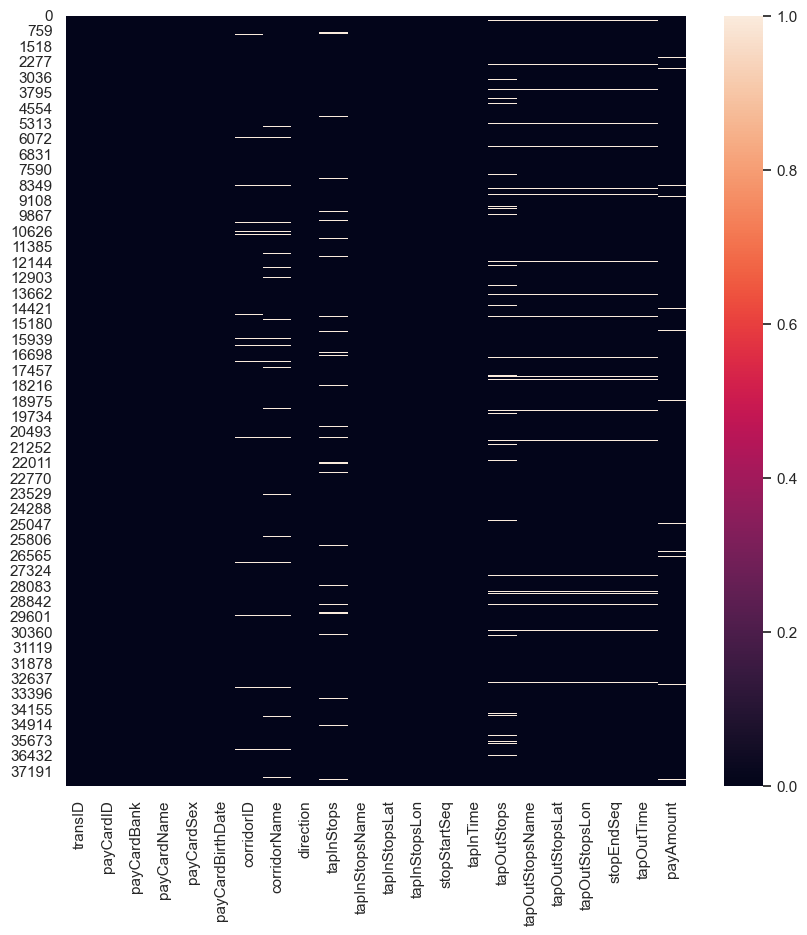

In [692]:
plt.figure(figsize=(10,10))

sns.heatmap(tj[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount']].isna())

### **PERSENTASE MISSING VALUES**

Dari heatmap di atas, langkah selanjutnya adalah mengetahui apakah terdapat kolom yang mempunyai data yang hilang. Kolom yang memiliki data yang hilang akan ditampilkan jika persentase missing value-nya di atas 0%.

In [693]:
nullvalue = pd.DataFrame(tj.isna().sum()/len(tj)*100)
nullvalue[nullvalue[0]>0]

,0
corridorID,3.316623
corridorName,5.092348
tapInStops,3.200528
tapOutStops,6.039578
tapOutStopsName,3.546174
tapOutStopsLat,3.546174
tapOutStopsLon,3.546174
stopEndSeq,3.546174
tapOutTime,3.546174
payAmount,2.656992


Berikut merupakan tabel berisikan daftar kolom yang sudah bersih.

In [694]:
nullvalue[nullvalue[0]==0]

,0
transID,0.0
payCardID,0.0
payCardBank,0.0
payCardName,0.0
payCardSex,0.0
payCardBirthDate,0.0
direction,0.0
tapInStopsName,0.0
tapInStopsLat,0.0
tapInStopsLon,0.0


Dengan banyaknya persentase pada data yang hilang, pembersihan data harus diperhatikan dari beberapa faktor. Untuk kasus ini, kita dapat menghilangkan baris yang tidak mempunyai `tapOutTime` karena kita tidak dapat mengetahui waktu jam pelanggan melakukan scan kartu di tempat tujuan jika valuenya kosong. Serta, kita dapat menghilangkan masing-masing kolom yang tidak mempunyai `corridorID` dan `corridorName`, jadi yang tersisa adalah baris yang mempunyai paling tidak salah satu dari `corridorID` atau `corridorName`.
`tapInStops` dan `tapOutStops` yang mempunyai missing value dapat diisi dengan `tapInStopsName` dan `tapOutStopsName`. `payAmount` dapat diisi dari tipe bus.

In [695]:
# tjcheck = tj[(tj['corridorID'].notna()) & (tj['corridorName'].notna()) & (tj['payAmount'].notna()) & (tj['tapOutTime'].notna())]

tjcheck = tj[(tj['tapOutTime'].notna())]
tjcheck = tjcheck[(tjcheck['corridorID'].notna()) | (tjcheck['corridorName'].notna())]
tjcheck

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


Berikut merupakan pengecekan jumlah missing values setelah dilakukan penghilangan pada `tapOutTime` serta `corridorID` atau `corridorName` yang tidak mempunyai nilai pada fase awal.

In [696]:
tjcheck.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           127
corridorName         776
direction              0
tapInStops          1146
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          913
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount            941
dtype: int64

Dengan menghilangkan `corridorID` dan `corridorName` yang keduanya tidak ada serta `tapOutTime`, ini menyebabkan missing values pada `tapOutStopsLat`, `tapOutStopsLon`, dan `stopStartSeq` menjadi 0. 

Pada langkah selanjutnya akan dilakukan pengecekan pada `corridorID` yang mempunyai missing value pada `payAmount`, dan sebaliknya. `corridorID` yang hilang akan dinamai berdasarkan `corridorName` dan `payAmount` akan diisi berdasarkan `corridorID` dan tipe bus yang digunakan pada [peta rute TransJakarta](https://transjakarta.co.id/peta-rute/).

In [697]:
tjcheck['corridorID'][tjcheck['payAmount'].isna()].unique()

array(['M7B', 'JAK.48B', '3H', 'JAK.48A', 'M1H', nan], dtype=object)

In [698]:
tjcheck[(tjcheck['payAmount'].isna()) & (tjcheck['corridorID'].isna())]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
24365,BZHS864Y0Z19TK,4933173483056,online,Utama Hassanah,F,1990,NaN,Stasiun Tebet - Rusun Karet Tengsin,1.0,B01834P,...,106.82109,13,2023-04-19 08:16:15,B03318P,Sawo Kecik Raya,-6.224852,106.85489,22.0,2023-04-19 09:56:58,NaN
28530,KGFB767O9D11GA,6011449627550133,dki,Cawisadi Hardiansyah,F,2005,NaN,Tanah Abang - St. Gondangdia,0.0,B00159P,...,106.81249,14,2023-04-25 21:35:20,B01787P,JPO Blok G,-6.188861,106.81135,16.0,2023-04-25 23:21:02,NaN
35262,MMWX176O7D17NN,4236399289828180970,brizzi,Eman Hutasoit,M,1956,NaN,BKN - Blok M,1.0,B03079P,...,106.81590,8,2023-04-14 13:50:00,B01825P,Kantor Pos Mampang,-6.240216,106.82259,10.0,2023-04-14 15:35:20,NaN


In [699]:
tjcheck[tjcheck['corridorName']=='Tanah Abang - St. Gondangdia'].head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
227,OHXC601I4F59SY,501828129459,flazz,"Unjani Damanik, S.T.",M,1975,M1H,Tanah Abang - St. Gondangdia,1.0,B04101P,...,106.83084,10,2023-04-03 05:02:44,B05445P,St. Gondangdia 2,-6.185054,106.8323,11.0,2023-04-03 06:01:54,NaN


In [700]:
tjcheck[tjcheck['corridorName']=='Stasiun Tebet - Rusun Karet Tengsin'].head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
198,WFVC738E7S60SH,3540286623681182,dki,"Karimah Pangestu, S.Kom",M,1968,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,1.0,B05695P,...,106.8516,21,2023-04-03 05:24:09,B02320P,Masjid Jami Al Mamur Bukit Duri,-6.225059,106.85606,23.0,2023-04-03 05:54:13,NaN


In [701]:
tjcheck[tjcheck['corridorName']=='BKN - Blok M'].head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11,IIEK980X1O23NZ,347204308990092,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1.0,P00254,...,106.83102,12,2023-04-03 06:22:10,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:21,NaN


In [702]:
tjcheck.loc[(tjcheck['corridorName'] == 'Tanah Abang - St. Gondangdia') & (tjcheck['corridorID'].isna()), 'corridorID'] = 'M1H'
tjcheck.loc[(tjcheck['corridorName'] == 'Stasiun Tebet - Rusun Karet Tengsin') & (tjcheck['corridorID'].isna()), 'corridorID'] = 'JAK.48A'
tjcheck.loc[(tjcheck['corridorName'] == 'BKN - Blok M') & (tjcheck['corridorID'].isna()), 'corridorID'] = 'M7B'

In [703]:
tjcheck.loc[(tjcheck['corridorID'] == 'JAK.48B') & (tjcheck['payAmount'].isna()), 'payAmount'] = 0
tjcheck.loc[(tjcheck['corridorID'] == 'JAK.48A') & (tjcheck['payAmount'].isna()), 'payAmount'] = 0
tjcheck.loc[(tjcheck['corridorID'] == '3H') & (tjcheck['payAmount'].isna()), 'payAmount'] = 3500
tjcheck.loc[(tjcheck['corridorID'] == 'M7B') & (tjcheck['payAmount'].isna()), 'payAmount'] = 3500
tjcheck.loc[(tjcheck['corridorID'] == 'M1H') & (tjcheck['payAmount'].isna()), 'payAmount'] = 3500

In [704]:
tjcheck

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [705]:
tjcheck[tjcheck['payAmount'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


Dari atas dapat disebutkan bahwa sudah tidak terdapat `payAmount` yang mempunyai missing value. 

Selanjutnya akan ditentukan jumlah data yang masih hilang.

In [706]:
tjcheck.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           124
corridorName         776
direction              0
tapInStops          1146
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          913
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount              0
dtype: int64

#### **PEMBERSIHAN DATA `CORRIDORID` DAN `CORRIDORNAME`**

Langkah selanjutnya adalah untuk mengisi `corridorID` yang hilang berdasarkan corridorName. Values pada `corridorID` harus disortir terlebih dahulu untuk mendapatkan hasil maksimal sesuai urutan data.

In [707]:
tjcheck.sort_values(by='corridorID', inplace=True)

# Forward fill missing values in 'corridorName' within each group of consecutive rows with the same corridorID
tjcheck['corridorName'] = tjcheck.groupby('corridorID')['corridorName'].ffill()

Berikut merupakan jumlah data yang error setelah dilakukan `ffill` pada `corridorID` dan `Name`, dari 776 menjadi 126.

In [708]:
tjcheck.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           124
corridorName         126
direction              0
tapInStops          1146
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          913
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount              0
dtype: int64

Karena `corridorName` lebih banyak mempunyai missing values ketimbang `corridorID`, kita harus menentukan terlebih dahulu `corridorName` mana yang mempunyai missing value.

In [709]:
tjcheck[(tjcheck['corridorID'].notna()) & (tjcheck['corridorName'].isna())]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
30948,ZFVQ238W3U30AQ,180067269047958,emoney,Jarwa Tampubolon,F,2005,1T,NaN,1.0,B00112P,...,106.823097,1,2023-04-27 17:43:40,B03312P,Sari Pan Pacific,-6.185037,106.82325,3.0,2023-04-27 19:12:47,20000.0
4179,DRSV959S7U97MK,4693229754928686,dki,Laila Pratama,F,1986,S31,NaN,0.0,B00148P,...,106.728650,0,2023-04-11 17:20:04,B05488P,St. MRT Fatmawati,-6.292589,106.79360,2.0,2023-04-11 18:26:01,20000.0


Values pada `corridorName` yang hilang akan ditentukan untuk `corridorID` 1T dan S31. Kemudian missing value pada dua data tersebut akan diisi dengan `corridorName` yang sesuai: Bintaro - Fatmawati untuk 1T dan Cibubur - Balai Kota.

In [710]:
tjcheck[((tjcheck['corridorID']=='1T') | (tjcheck['corridorID']=='S31')) & (tjcheck['corridorName'].notna())]

# 1T - Bintaro - Fatmawati
# S31 - Cibubur - Balai Kota

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
30732,MOGZ891D9R83XH,372186852282778,emoney,Uli Suartini,F,2012,1T,Cibubur - Balai Kota,1.0,B03313P,...,106.82317,4,2023-04-27 20:48:29,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-27 22:38:55,20000.0
30448,WOVY954S6I97SG,180067269047958,emoney,Jarwa Tampubolon,F,2005,1T,Cibubur - Balai Kota,0.0,B00127P,...,106.81632,3,2023-04-27 09:19:21,B05502P,St. Sudirman 2,-6.201883,106.82277,9.0,2023-04-27 10:59:31,20000.0
28121,FLNE028A9Q23SV,6011317469180253,dki,Ulya Suartini,F,1981,1T,Cibubur - Balai Kota,0.0,B00113P,...,106.82275,14,2023-04-25 09:33:52,B00806P,IRTI,-6.180300,106.82618,15.0,2023-04-25 11:22:03,20000.0
15721,GCGX748H9Q21BC,4393424535509774814,brizzi,"Ratih Nurdiyanti, M.Pd",M,2008,1T,Cibubur - Balai Kota,0.0,B02863P,...,106.82280,11,2023-04-06 17:19:32,B00102P,Balai Kota 1,-6.180598,106.82847,16.0,2023-04-06 18:17:03,20000.0
24732,BYYP970F9N60XD,372186852282778,emoney,Uli Suartini,F,2012,1T,Cibubur - Balai Kota,1.0,B03313P,...,106.82317,4,2023-04-19 17:36:15,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-19 19:17:20,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,JCDQ110Y8B08DW,4693229754928686,dki,Laila Pratama,F,1986,S31,Bintaro - Fatmawati,0.0,B00148P,...,106.72865,0,2023-04-19 16:49:59,B05488P,St. MRT Fatmawati,-6.292589,106.79360,2.0,2023-04-19 18:40:03,20000.0
1179,LIFS095E2U12YQ,4693229754928686,dki,Laila Pratama,F,1986,S31,Bintaro - Fatmawati,0.0,B00148P,...,106.72865,0,2023-04-04 17:33:25,B05488P,St. MRT Fatmawati,-6.292589,106.79360,2.0,2023-04-04 19:30:51,20000.0
21427,QOSH909A5G34LH,378459243668060,emoney,"Nurul Handayani, S.Ked",M,1995,S31,Bintaro - Fatmawati,1.0,B05488P,...,106.79360,0,2023-04-14 08:16:03,B01184P,Jln. Kaimun Jaya,-6.292537,106.78705,2.0,2023-04-14 09:59:18,20000.0
31311,HFOO206N3N39WG,213169744437795,emoney,Raden Mardhiyah,F,1987,S31,Bintaro - Fatmawati,1.0,B00229P,...,106.77680,4,2023-04-28 09:58:34,B00148P,Bintaro Xchange,-6.286813,106.72865,5.0,2023-04-28 11:47:26,20000.0


In [711]:
tjcheck.loc[(tjcheck['corridorID'] == '1T') & (tjcheck['corridorName'].isna()), 'corridorName'] = 'Bintaro - Fatmawati'
tjcheck.loc[(tjcheck['corridorID'] == 'S31') & (tjcheck['corridorName'].isna()), 'corridorName'] = 'Cibubur - Balai Kota'

Terlihat missing values pada `corridorID` dan `corridorName` bernilai sama dengan nilai 124.

In [712]:
tjcheck.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           124
corridorName         124
direction              0
tapInStops          1146
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          913
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount              0
dtype: int64

In [713]:
tjcheck

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
28478,EWLP943J7Z46RX,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,1.0,P00261,...,106.82309,12,2023-04-25 06:10:17,P00026,Bundaran Senayan,-6.227869,106.80094,18.0,2023-04-25 07:27:33,3500.0
26274,UXSO069N1S19VG,6011651850954961,dki,Cut Malika Wastuti,M,1967,1,Blok M - Kota,1.0,P00256,...,106.82299,10,2023-04-21 06:26:49,P00071,Gelora Bung Karno,-6.224217,106.80580,17.0,2023-04-21 06:59:12,3500.0
13774,UPOP371M3P18EY,6011651850954961,dki,Cut Malika Wastuti,M,1967,1,Blok M - Kota,0.0,P00293,...,106.81846,15,2023-04-04 21:44:25,P00139,Olimo,-6.149300,106.81669,17.0,2023-04-04 22:35:42,3500.0
15274,CMZP177E0I34YL,6011651850954961,dki,Cut Malika Wastuti,M,1967,1,Blok M - Kota,1.0,P00256,...,106.82299,10,2023-04-06 08:03:44,P00071,Gelora Bung Karno,-6.224217,106.80580,17.0,2023-04-06 08:30:00,3500.0
24978,HIZN906D8M07CR,4799378402955576,dki,Olivia Prayoga,M,1988,1,Blok M - Kota,0.0,P00012,...,106.81528,6,2023-04-19 20:23:43,NaN,Bank Indonesia Arah Utara,-6.182776,106.82280,12.0,2023-04-19 22:10:28,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37008,FPHP255E9G24MW,4121673937975,online,H. Eko Novitasari,F,1994,NaN,NaN,0.0,B06563P,...,106.77963,38,2023-04-18 18:32:22,B05714P,Term. Muara Angke 2,-6.109001,106.77349,40.0,2023-04-18 19:50:08,0.0
37113,JEWP630L2B54XZ,349683800593553,emoney,Asirwada Megantara,F,2009,NaN,NaN,0.0,B03270P,...,106.88288,0,2023-04-18 18:17:14,B05785P,TPU Kb. Nanas 2,-6.232106,106.88017,1.0,2023-04-18 19:18:27,0.0
37337,GXHM211P5G49NI,2221445182130548,dki,Natalia Haryanti,F,1993,NaN,NaN,1.0,B00226P,...,106.89628,1,2023-04-19 11:06:35,B00248P,Cibubur Junction,-6.368735,106.89366,2.0,2023-04-19 12:47:51,3500.0
37380,XUMJ867G9E94VY,340306170432199,emoney,Carla Utama,F,1980,NaN,NaN,0.0,B05653P,...,106.87352,5,2023-04-19 06:54:48,B02077P,Koperasi Serba Usaha,-6.222036,106.89954,23.0,2023-04-19 07:32:47,0.0


#### **`tapInStops` DAN `tapOutStops`**

Langkah selanjutnya adalah mengisi `corridorID`, `Name` serta `tapInStops` dan `tapOutStops`. `tapInStops` serta `tapOutStops` dapat dilihat dari `tapInStopsName` serta `tapOutStopsName`. `tapOutStopsName` akan disortir terlebih dahulu kemudian `tapOutStops` diisi secara `ffill` (forward fill) berdasarkan `tapOutStopsName`.

In [714]:
tjcheck.sort_values(by='tapOutStopsName', inplace=True)


tjcheck['tapOutStops'] = tjcheck.groupby('tapOutStopsName')['tapOutStops'].ffill()

In [715]:
tjcheck.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID           124
corridorName         124
direction              0
tapInStops          1146
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops           44
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount              0
dtype: int64

`tapOutStops` telah diisi hingga missing values menjadi 44.
Langkah selanjutnya adalah untuk menyortir `tapInStopsName`, kemudian `tapOutStops` diisi secara `ffill` berdasarkan `tapInStopsName`.

In [716]:
tjcheck.sort_values(by='tapInStopsName', inplace=True)


tjcheck['tapInStops'] = tjcheck.groupby('tapInStopsName')['tapInStops'].ffill()

In [717]:
tjcheck.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID          124
corridorName        124
direction             0
tapInStops           91
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops          44
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount             0
dtype: int64

##### **PENGECEKAN ROW DENGAN MISSING VALUE UNTUK `tapInStops` DAN `tapOutStops`, SERTA TAHAP PEMBERSIHAN DATA TERAKHIR**

In [718]:
tjcheck[(tjcheck['tapInStops'].isna()) & (tjcheck['tapOutStops'].isna())]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
33424,ONZF587U9M08JU,3536572066357562,dki,Vivi Salahudin,F,1990,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,NaN,...,106.91742,1,2023-04-22 15:16:20,NaN,Masjid Al Waqof,-6.110646,106.91733,2.0,2023-04-22 15:54:34,0.0


Langkah selanjutnya adalah untuk menentukan apakah terdapat baris dengan missing value pada `tapInStops` serta `tapOutStops`. Dapat disimpulkan terdapat satu nilai, dan ini akan menjadi pertimbangan untuk pembersihan kedua, yaitu untuk meremove baris yang tidak mempunyai `tapInStops`, `tapOutStops`, `corridorID` dan `corridorName`. Kemudian index akan kembali disortir, menjadikan dataset dengan index terurut seperti semula.

In [719]:
tjcheck2 = tjcheck[(tjcheck['tapInStops'].notna()) & (tjcheck['tapOutStops'].notna()) & (tjcheck['corridorID'].notna()) & (tjcheck['corridorName'].notna())]
tjcheck2

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
1830,PUOU636M4L22VV,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-06 06:03:49,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-06 06:50:03,0.0
10830,OPCL537X7D67CM,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-27 05:20:59,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-27 05:57:21,0.0
10230,JBER408E7Q95CG,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-26 05:07:45,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-26 05:40:51,0.0
3030,YETM164Y9C45EC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-10 06:05:10,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-10 06:50:20,0.0
3630,MQLX730I6Y08LY,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-11 06:28:20,B00536P,Gg. Puskesmas Kebagusan Raya,-6.296645,106.82730,21.0,2023-04-11 06:49:07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30729,UISB475W1J23YY,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-27 20:53:00,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-27 22:23:45,0.0
16729,CWJN886G7D04PH,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-07 17:04:29,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-07 18:58:35,0.0
26729,BFTA588K7T48BB,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-21 17:18:15,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-21 18:38:20,0.0
15729,MNQZ762M6G48NG,5250092671931114,dki,Kenzie Pranowo,F,1956,JAK.32,Lebak Bulus - Petukangan,0.0,B05933P,...,106.75626,26,2023-04-06 19:15:04,B01361P,Jln. Manunggal II Petukangan,-6.245931,106.75190,39.0,2023-04-06 20:15:27,0.0


In [720]:
tjcheck2 = tjcheck2.sort_index()
tjcheck2

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [721]:
tjcheck2.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

##### **PERSIAPAN ANALISIS DATA**

Dengan semua missing values bernilai 0, langkah selanjutnya adalah untuk untuk menambahkan kolom untuk pemeriksaan usia. Kolom barunya adalah `Age` dimana valuenya bernilai 2023 dikurangi oleh tahun yang dicantumkan pada `payCardBirthDate`.

In [722]:
tjcheck2['Age'] = 2023-tjcheck2['payCardBirthDate']

In [723]:
tjcheck2

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,19
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,49
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,47
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,47


#### **PENGGOLONGAN USIA**


Di atas juga sudah dideskripsikan usia termuda, median serta tertua, masing-masing 11, 33 dan 77 tahun. Kelompok umur juga dibentuk dalam kolom `ageGroup` berdasarkan golongan yang dikeluarkan oleh [Kementerian Kesehatan](https://ayosehat.kemkes.go.id/home): remaja (10-18), dewasa (19-59) dan lansia (60+).

In [724]:
bins = [9, 19, 60, 120]
labels = ['Remaja', 'Dewasa', 'Lansia']

tjcheck2['ageGroup'] = pd.cut(tjcheck2['Age'], bins=bins, labels=labels, right=False)


In [725]:
tjcheck2

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Age,ageGroup
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15,Remaja
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26,Dewasa
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31,Dewasa
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45,Dewasa
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41,Dewasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,19,Dewasa
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,49,Dewasa
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,47,Dewasa
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,47,Dewasa


#### **KONVERSI OBJECT KE DATETIME UNTUK TAPINTIME DAN TAPOUTTIME**

Mengingat `tapInTime` dan `tapOutTime` masih belum diubah dari object, akan dilakukan konversi dari object ke datetime.

In [726]:
tjcheck2['tapInTime'] = pd.to_datetime(tjcheck2['tapInTime'])
tjcheck2['tapOutTime'] = pd.to_datetime(tjcheck2['tapOutTime'])

In [727]:
tjcheck2[['tapInTime', 'tapOutTime']].dtypes

tapInTime     datetime64[ns]
tapOutTime    datetime64[ns]
dtype: object

#### **PENENTUAN JAM TAP-IN DAN TAP-OUT**

Empat kolom baru akan dibuat untuk menentukan jam serta hari tap-in atau tap-out sebagai pertimbangan untuk mengetahui jam keramaian stasiun.

In [728]:
tjcheck2['tapInHour'] = tjcheck2['tapInTime'].dt.hour
tjcheck2['tapOutHour'] = tjcheck2['tapOutTime'].dt.hour

In [729]:
tjcheck2['tapInDay'] = tjcheck2['tapInTime'].dt.day_name()
tjcheck2['tapOutDay'] = tjcheck2['tapOutTime'].dt.day_name()

### **KATEGORI BUS DALAM FORMAT STRING / OBJECT**

Untuk memberikan kategori bus dalam bentuk teks, akan dibentuk kolom baru di bawah nama busType. Golongan Jak Lingko akan dinamakan jika `payAmount`-nya 0, Transjakarta jika 3.500, dan RoyalTrans jika 20.000.

In [730]:
def bustype(x):
    if x==0:
        return 'Jak-Lingko'
    elif x==3500:
        return 'Transjakarta'
    else:
        return 'RoyalTrans'
    

tjcheck2['busType'] = tjcheck2['payAmount'].apply(bustype)

In [731]:
tjcheck2

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,Age,ageGroup,tapInHour,tapOutHour,tapInDay,tapOutDay,busType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,12.0,2023-04-03 06:00:53,3500.0,15,Remaja,5,6,Monday,Monday,Transjakarta
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,21.0,2023-04-03 06:40:01,3500.0,26,Dewasa,5,6,Monday,Monday,Transjakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,39.0,2023-04-03 06:50:55,3500.0,31,Dewasa,5,6,Monday,Monday,Transjakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,29.0,2023-04-03 06:28:16,3500.0,45,Dewasa,5,6,Monday,Monday,Transjakarta
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,15.0,2023-04-03 06:57:03,3500.0,41,Dewasa,6,6,Monday,Monday,Transjakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,13.0,2023-04-21 19:55:49,3500.0,19,Dewasa,18,19,Friday,Friday,Transjakarta
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2.0,2023-04-18 22:28:22,3500.0,49,Dewasa,21,22,Tuesday,Tuesday,Transjakarta
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,14.0,2023-04-04 13:27:25,20000.0,47,Dewasa,10,13,Tuesday,Tuesday,RoyalTrans
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,34.0,2023-04-15 20:27:50,0.0,47,Dewasa,19,20,Saturday,Saturday,Jak-Lingko


Data yang bersih secara final kemudian akan didownload dalam bentuk CSV. 

In [732]:
tjcheck2.to_csv('TJcleaned2.csv', index=False)

## **DATA ANALYSIS**

Setelah data sepenuhnya dibersihkan, data tersebut sudah siap untuk dianalisa. Hal pertama yang ingin dilakukan adalah memanggil variabel `tjclean` untuk membaca file `.csv` data bersih kemudian dikonversi ke DataFrame. Insight yang akan dianalisa adalah: 
- Halte dan koridor yang paling banyak digunakan secara keseluruhan
- Proporsi jumlah transaksi berdasarkan gender
- Koridor yang digunakan oleh Perempuan
- Proporsi jumlah transaksi berdasarkan usia
- Halte dan koridor yang digunakan oleh remaja serta lansia. 
- Koridor berdasarkan jam sibuk dan hari pada 

In [733]:
tjclean = pd.DataFrame(pd.read_csv('TJcleaned2.csv'))

tjclean

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,Age,ageGroup,tapInHour,tapOutHour,tapInDay,tapOutDay,busType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,12.0,2023-04-03 06:00:53,3500.0,15,Remaja,5,6,Monday,Monday,Transjakarta
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,21.0,2023-04-03 06:40:01,3500.0,26,Dewasa,5,6,Monday,Monday,Transjakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,39.0,2023-04-03 06:50:55,3500.0,31,Dewasa,5,6,Monday,Monday,Transjakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,29.0,2023-04-03 06:28:16,3500.0,45,Dewasa,5,6,Monday,Monday,Transjakarta
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,15.0,2023-04-03 06:57:03,3500.0,41,Dewasa,6,6,Monday,Monday,Transjakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35216,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,13.0,2023-04-21 19:55:49,3500.0,19,Dewasa,18,19,Friday,Friday,Transjakarta
35217,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2.0,2023-04-18 22:28:22,3500.0,49,Dewasa,21,22,Tuesday,Tuesday,Transjakarta
35218,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,14.0,2023-04-04 13:27:25,20000.0,47,Dewasa,10,13,Tuesday,Tuesday,RoyalTrans
35219,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,34.0,2023-04-15 20:27:50,0.0,47,Dewasa,19,20,Saturday,Saturday,Jak-Lingko


### **DEMOGRAFI PENGGUNA DAN PENGGUNAAN TRANSJAKARTA**

Untuk mengetahui data yang dianalisa, kita akan menganalisa dari dua sudut: operasional dan pelanggan. Dari segi operasional, kita ingin mengetahui penggunaan koridor dan halte. Dari segi pelanggan, kita ingin mengetahui proporsi jenis kelamin dan usia. 

#### **PENGGUNAAN KORIDOR TRANSJAKARTA DI BULAN APRIL 2023**

Di bawah merupakan sepuluh penggunaan bus yang sering digunakan pada periode April 2023.

In [734]:
corridor = tjclean.groupby(['corridorID', 'corridorName']).size().reset_index(name='Counts').sort_values(ascending=False, by='Counts').head(10)
corridor = corridor.reset_index()
corridor = corridor.drop(['index'],axis=1)
corridor

,corridorID,corridorName,Counts
0,1T,Cibubur - Balai Kota,381
1,S21,Ciputat - CSW,375
2,JIS3,Harmoni - Jakarta International Stadium,330
3,JAK.06,Kampung Rambutan - Pondok Gede,327
4,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,322
5,8C,Kebayoran Lama - Tanah Abang,320
6,2E,Rusun Rawa Bebek - Kodamar,305
7,M7B,BKN - Blok M,298
8,9D,Pasar Minggu - Tanah Abang,296
9,JAK.72,Kampung Rambutan - Pasar Rebo via Poncol,290


Text(0, 0.5, 'Jurusan')

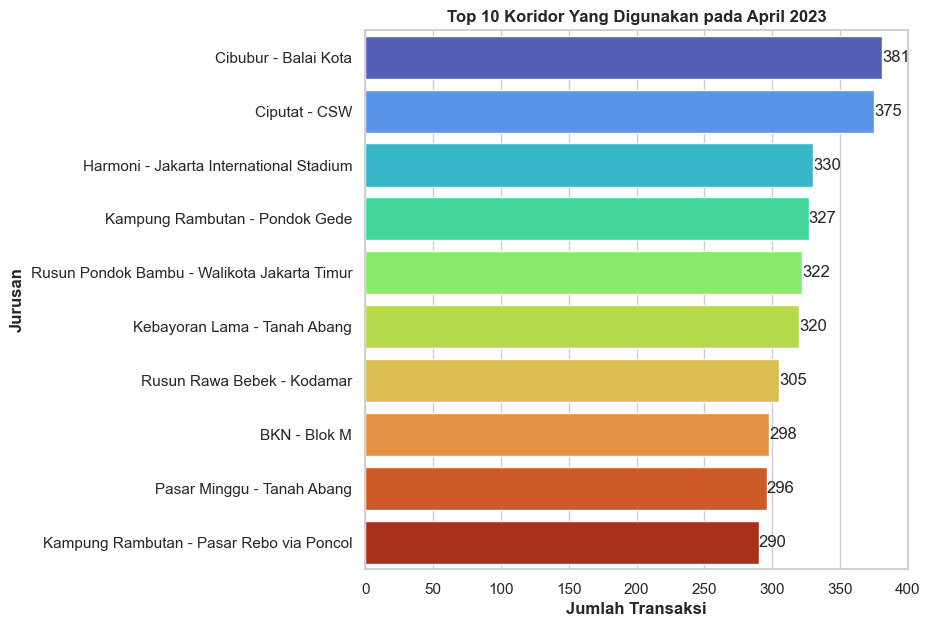

In [735]:
plt.figure(figsize=(7,7))

zx = sns.barplot(x=corridor['Counts'], y=corridor['corridorName'], 
                 palette=sns.color_palette("turbo", len(corridor['Counts'])))

# Enumerate over the bars to add labels
for i, (count, corridor) in enumerate(zip(corridor['Counts'], corridor['corridorName'])):
    zx.text(count, i, f'{count}', ha='left', va='center')

plt.title('Top 10 Koridor Yang Digunakan pada April 2023', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Jurusan', fontweight='bold')

Dari bar chart di atas, dapat diambil insight koridor yang paling banyak beroperasi adalah Cibubur - Balai Kota (1T) dan Ciputat - CSW (S21).

#### **PENGGUNAAN HALTE TRANSJAKARTA DI BULAN APRIL 2023**

Selanjutnya dilakukan untuk analisa halte. Di bawah merupakan sepuluh halte yang sering dikunjungi pada saat Tap-In dan Tap-Out pada periode April 2023.

In [736]:
tapInStop = tjclean.groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Counts').sort_values(ascending=False, by='Counts').head(10)
tapInStop = tapInStop.reset_index()
tapInStop = tapInStop.drop(['index'],axis=1)
tapInStop

,tapInStops,tapInStopsName,Counts
0,P00170,Penjaringan,227
1,P00064,Garuda Taman Mini,197
2,P00016,BKN,159
3,P00297,BNN LRT,144
4,P00164,Pejaten,144
5,B03277P,Rusun Kapuk Muara,125
6,P00169,Penggilingan,124
7,P00254,Tendean,120
8,B00248P,Cibubur Junction,119
9,P00221,Seskoal,117


In [737]:
tapOutStop = tjclean.groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Counts').sort_values(ascending=False, by='Counts').head(10)
tapOutStop = tapOutStop.reset_index()
tapOutStop = tapOutStop.drop(['index'],axis=1)
tapOutStop

,tapOutStops,tapOutStopsName,Counts
0,P00016,BKN,301
1,P00170,Penjaringan,264
2,B05725P,Term. Senen,188
3,B05708P,Term. Kampung Rambutan,158
4,P00137,Monas,156
5,P00112,Kejaksaan Agung,155
6,P00199,Ragunan,145
7,P00179,Pinang Ranti,141
8,B03396P,Kota Kasablanka,128
9,P00181,Pluit,127


Text(0, 0.5, 'Halte')

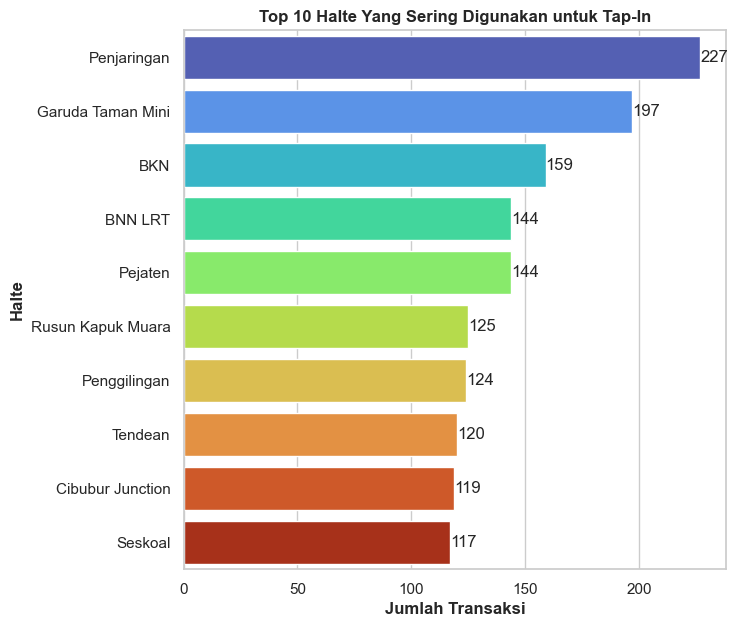

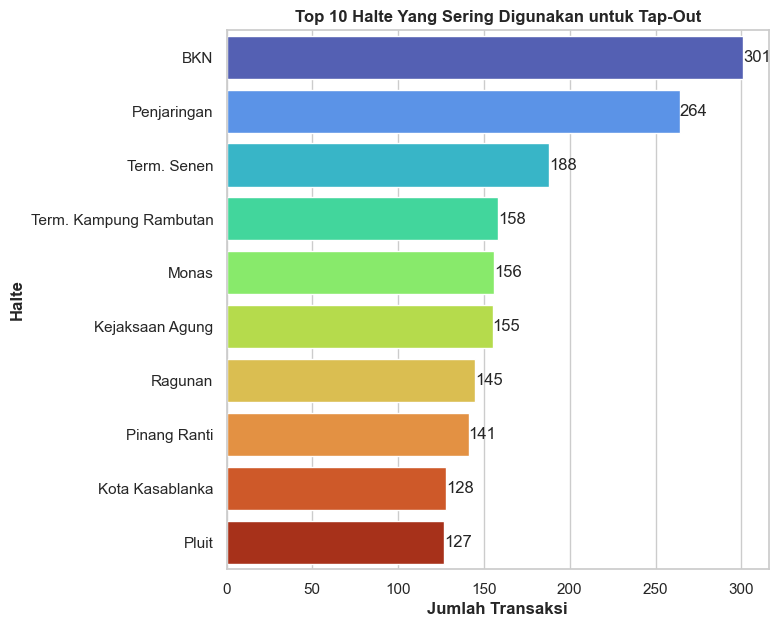

In [738]:
plt.figure(figsize=(7,7))

zx2 = sns.barplot(x=tapInStop['Counts'], y=tapInStop['tapInStopsName'], 
                 palette=sns.color_palette("turbo", len(tapInStop['Counts'])))


for i, (count, corridor) in enumerate(zip(tapInStop['Counts'], tapInStop['tapInStopsName'])):
    zx2.text(count, i, f'{count}', ha='left', va='center')

plt.title('Top 10 Halte Yang Sering Digunakan untuk Tap-In', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Halte', fontweight='bold')



plt.figure(figsize=(7,7))

zx3 = sns.barplot(x=tapOutStop['Counts'], y=tapOutStop['tapOutStopsName'], 
                 palette=sns.color_palette("turbo", len(tapOutStop['Counts'])))


for i, (count, corridor) in enumerate(zip(tapOutStop['Counts'], tapOutStop['tapOutStopsName'])):
    zx3.text(count, i, f'{count}', ha='left', va='center')

plt.title('Top 10 Halte Yang Sering Digunakan untuk Tap-Out', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Halte', fontweight='bold')




Dari kedua bar chart di atas, dapat diambil insight dan kesimpulan bahwa aktivitas pada mayoritas pelanggan TransJakarta menggunakan halte BKN dan Penjaringan.

#### **PROPORSI GENDER**


Selanjutnya akan ditentukan proporsi berdasarkan gender. Pada `plt.pie` label F dan M akan diganti dengan label 'Wanita' dan 'Pria'.

In [739]:
gender = tjclean.groupby('payCardSex')['payCardSex'].value_counts()
pd.DataFrame(gender)

,count
payCardSex,
F,18735
M,16486


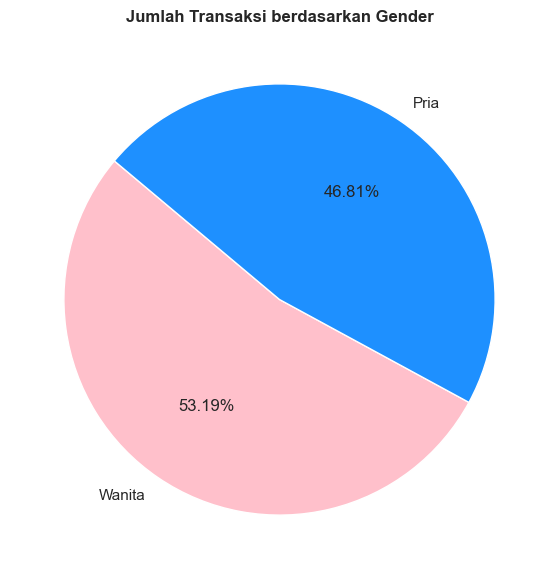

In [740]:
plt.figure(figsize=(7,7))
plt.pie(gender.values, labels=['Wanita', 'Pria'], colors=['pink', 'dodgerblue'], autopct='%1.2f%%', startangle=140)
plt.title('Jumlah Transaksi berdasarkan Gender', fontweight='bold')
plt.show()

Insight yang dapat diambil dari pie chart di atas memberikan kesimpulan bahwa sebanyak 53.19% transaksi dilakukan oleh Wanita. Sisanya, oleh Pria, terdapat 46.81% dari total pengguna TransJakarta.


#### **DISTRIBUSI USIA DAN PROPORSI GOLONGAN USIA**


Selanjutnya, di bawah akan dibentuk histogram untuk menampilkan distribusi serta range umur pada Pengguna TransJakarta. Pada saat yang sama, selanjutnya akan ditentukan jumlah transaksi berdasarkan golongan usia. Terdapat tiga golongan: remaja (21 dan kebawah), usia produktif (21-65), dan lansia (65 ke atas). Kemudian langkah selanjutnya adalah untuk membentuk pie chart untuk menentukan proporsi. 

Text(0, 0.5, 'Jumlah Pengguna')

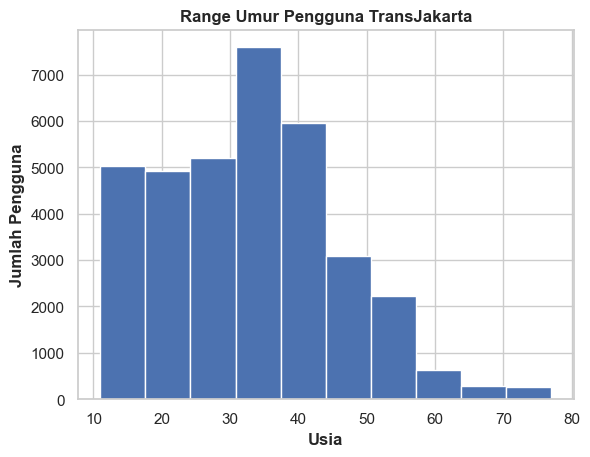

In [741]:
tjclean['Age'].hist()
plt.title('Range Umur Pengguna TransJakarta', fontweight='bold')
plt.xlabel('Usia', fontweight='bold')
plt.ylabel('Jumlah Pengguna', fontweight='bold')

In [742]:
ageGroup = tjclean.groupby('ageGroup')['ageGroup'].value_counts()
pd.DataFrame(ageGroup)

,count
ageGroup,
Dewasa,28802
Lansia,712
Remaja,5707


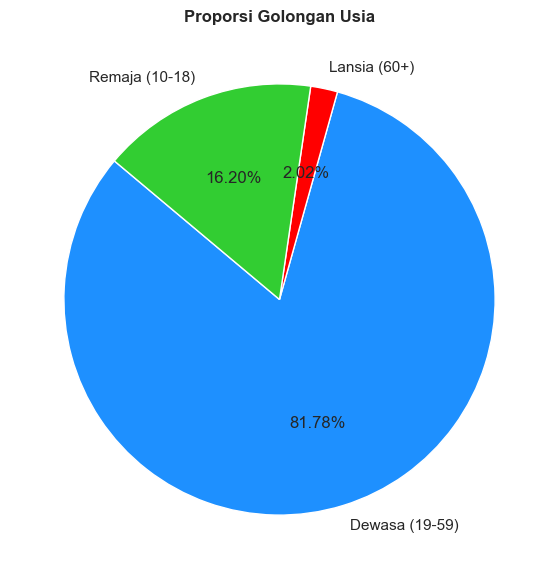

In [743]:
plt.figure(figsize=(7,7))
plt.pie(ageGroup.values, labels=['Dewasa (19-59)', 'Lansia (60+)', 'Remaja (10-18)'], colors=['dodgerblue', 'red', 'limegreen'],  
        autopct='%1.2f%%', startangle=140)
plt.title('Proporsi Golongan Usia', fontweight='bold')
plt.show()

Dapat diberikan insightnya dari histogram serta pie chart yang diberikan, yakni: 
- Pengguna Dewasa mendominasi dengan proporsi 81.78%, dengan Mayoritas pengguna berusia 30-40 tahun.
- Dengan pengguna lansia dan remaja mempunyai proporsi 2.02% dan 16.2%, dapat disimpulkan bahwa TransJakarta kurang menunjang pengguna berdasarkan usia, khususnya lansia, dengan range berusia 60-77 tahun. Perlu diketahi usia tertua pelanggan adalah 77 tahun, sesuai insight yang diberikan pada Data Description.

#### **KORIDOR YANG SERING DIGUNAKAN WANITA**


Dengan banyaknya wanita di dalam transaksi TransJakarta, langkah selanjutnya adalah untuk membuat sebuah tabel atau variabel baru untuk menampilkan semua transaksi untuk gender Wanita (`payCardSex` = 'F').

In [744]:
female = tjclean[tjclean['payCardSex']=='F']
female

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,Age,ageGroup,tapInHour,tapOutHour,tapInDay,tapOutDay,busType
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,21.0,2023-04-03 06:40:01,3500.0,26,Dewasa,5,6,Monday,Monday,Transjakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,39.0,2023-04-03 06:50:55,3500.0,31,Dewasa,5,6,Monday,Monday,Transjakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,29.0,2023-04-03 06:28:16,3500.0,45,Dewasa,5,6,Monday,Monday,Transjakarta
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,6.0,2023-04-03 05:52:25,20000.0,30,Dewasa,5,5,Monday,Monday,RoyalTrans
6,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,16.0,2023-04-03 06:51:12,20000.0,31,Dewasa,6,6,Monday,Monday,RoyalTrans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35214,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,F,2000,JAK.80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,...,42.0,2023-04-19 10:32:30,0.0,23,Dewasa,8,10,Wednesday,Wednesday,Jak-Lingko
35215,ZXVG342K6T27GU,4475487986105118550,brizzi,"Tgk. Dipa Purnawati, S.E.I",F,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,...,35.0,2023-04-14 13:15:25,0.0,11,Remaja,11,13,Friday,Friday,Jak-Lingko
35216,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,13.0,2023-04-21 19:55:49,3500.0,19,Dewasa,18,19,Friday,Friday,Transjakarta
35218,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,14.0,2023-04-04 13:27:25,20000.0,47,Dewasa,10,13,Tuesday,Tuesday,RoyalTrans


Langkah selanjutnya adalah untuk mengetahui 10 koridor yang sering digunakan oleh Wanita.

In [745]:
top10female = female.groupby(['corridorID', 'corridorName']).size().reset_index(name='Counts').sort_values(ascending=False, by='Counts').head(10)
top10female


,corridorID,corridorName,Counts
102,9D,Pasar Minggu - Tanah Abang,216
221,T11,Poris Plawad - Bundaran Senayan,213
45,2E,Rusun Rawa Bebek - Kodamar,207
128,JAK.112,Terminal Tanah Merah - Pulo Gadung,196
158,JAK.36,Cilangkap - Cililitan,194
211,M7B,BKN - Blok M,175
109,B14,Bekasi Barat - Kuningan,175
48,2P,Gondangdia - Senen,173
121,JAK.06,Kampung Rambutan - Pondok Gede,173
95,8D,Joglo - Blok M,167


Text(0, 0.5, 'Jurusan')

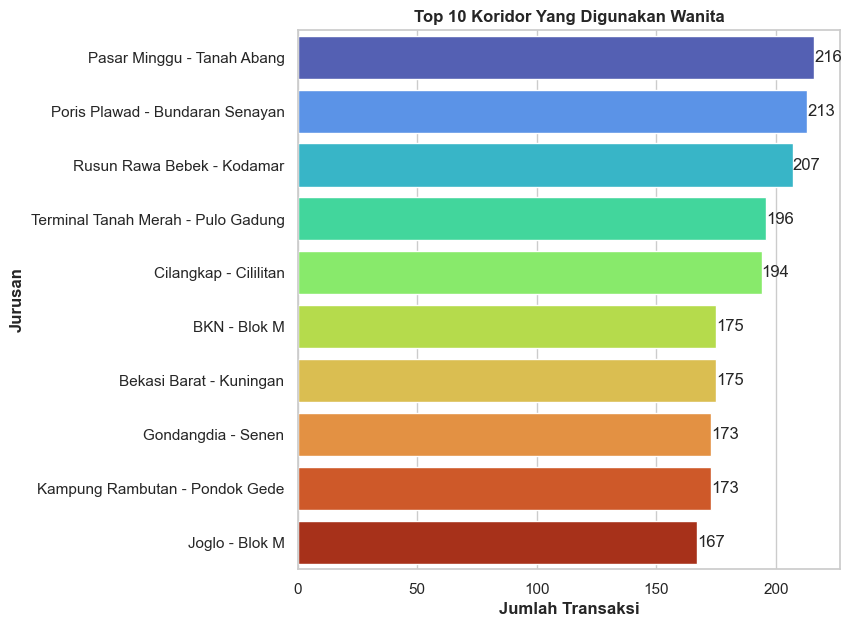

In [746]:
plt.figure(figsize=(7,7))

ax = sns.barplot(x=top10female['Counts'], y=top10female['corridorName'], 
                 palette=sns.color_palette("turbo", len(top10female['Counts'])))



# Enumerate over the bars to add labels
for i, (count, corridor) in enumerate(zip(top10female['Counts'], top10female['corridorName'])):
    ax.text(count, i, f'{count}', ha='left', va='center')

plt.title('Top 10 Koridor Yang Digunakan Wanita', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Jurusan', fontweight='bold')

Dari bar chart di atas, Koridor 9D (Pasar Minggu - Tanah Abang), T11 (Poris Plawad - Bundaran Senayan) dan 2E (Rusun Rawa Bebek - Kodamar) mempunyai lebih dari 200 lebih transaksi untuk penggunaan oleh Wanita. Koridor JAK.112 (Terminal Tanah Merah - Pulo Gadung) dan JAK.36 (Cilangkap - Cililitan) menyusul, melengkapi 5 besar dengan jarak transaksi kurang untuk setiap peringkat kurang dari 10. Dapat disimpulkan, kelima koridor tersebut merupakan koridor yang membutuhkan perlakuan khusus untuk wanita.

#### **KORIDOR YANG SERING DIGUNAKAN LANSIA**


Langkah selanjutnya adalah untuk menentukan koridor yang sering digunakan oleh lansia, kemudian halte yang dilalui koridor tersebut.

In [747]:
# INISIASI TABEL TRANSAKSI BERDASARKAN GOLONGAN USIA LANSIA

lansia = tjclean[tjclean['ageGroup']=='Lansia']

In [748]:
top10lansiacorr = pd.DataFrame(lansia.groupby('corridorID')[['corridorID','corridorName']].value_counts().sort_values(ascending=False).head(10))
top10lansiacorr = top10lansiacorr.reset_index()
top10lansiacorr

,corridorID,corridorName,count
0,6V,Ragunan - Gelora Bung Karno,73
1,7C,Cibubur - BKN,39
2,6N,Ragunan - Blok M via Kemang,38
3,9A,PGC 2 - Grogol 2,38
4,M1,Blok M - Kota,38
5,JAK.42,Kampung Melayu - Pondok Kelapa,37
6,10D,Kampung Rambutan - Tanjung Priok,37
7,8C,Kebayoran Lama - Tanah Abang,37
8,M7,Kampung Rambutan - Monas,37
9,JAK.07,Tanah Abang - Grogol via Tawakal,36


Text(0, 0.5, 'Halte')

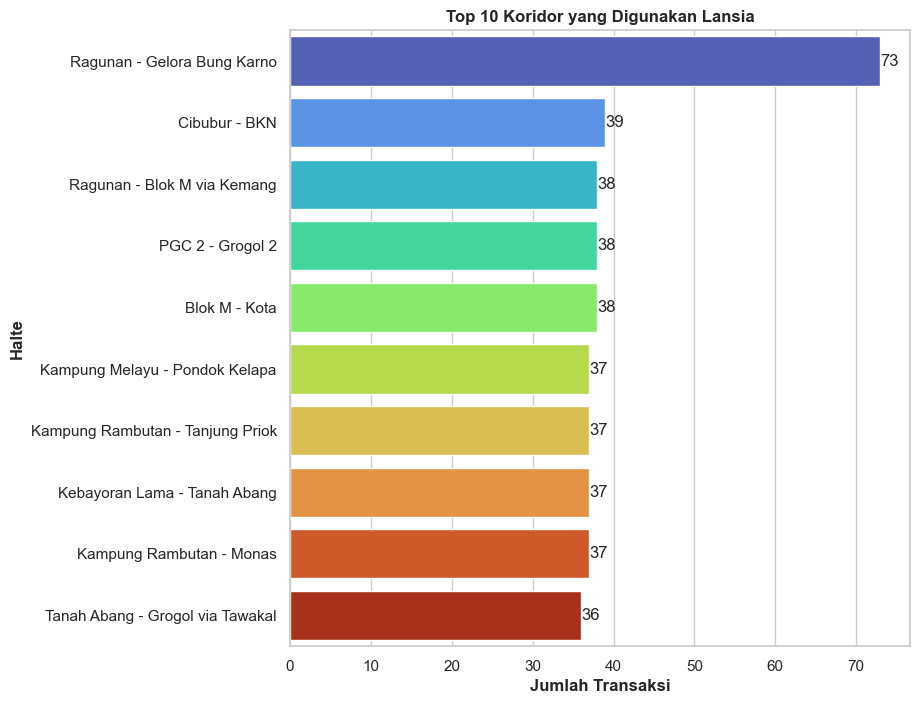

In [749]:
plt.figure(figsize=(8,8))

bx = sns.barplot(x=top10lansiacorr['count'], y=top10lansiacorr['corridorName'],
                 palette=sns.color_palette("turbo", len(top10lansiacorr['count'])))

# Enumerate over the bars to add labels
for i, (count, stop) in enumerate(zip(top10lansiacorr['count'], top10lansiacorr['corridorName'])):
    bx.text(count, i, f'{count}', ha='left', va='center')

plt.title('Top 10 Koridor yang Digunakan Lansia', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Halte', fontweight='bold')

In [750]:
lansiaragunan = tjclean[(tjclean['ageGroup']=='Lansia') & (tjclean['corridorID']=='6V') & (tjclean['corridorName']=='Ragunan - Gelora Bung Karno')]
lansiaragunan

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,Age,ageGroup,tapInHour,tapOutHour,tapInDay,tapOutDay,busType
146,FZGD727V6X43JZ,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,0.0,P00053,...,13.0,2023-04-03 05:49:04,3500.0,77,Lansia,5,5,Monday,Monday,Transjakarta
421,LEIJ386V6Z47EQ,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,1.0,P00133,...,4.0,2023-04-03 17:38:55,3500.0,77,Lansia,16,17,Monday,Monday,Transjakarta
973,LNHV081M9L52MM,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,1.0,P00133,...,4.0,2023-04-04 17:09:20,3500.0,77,Lansia,16,17,Tuesday,Tuesday,Transjakarta
1256,AOUR264G8Q88QF,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,0.0,P00053,...,13.0,2023-04-05 06:57:10,3500.0,77,Lansia,6,6,Wednesday,Wednesday,Transjakarta
1533,IYRJ082D0U44CC,3507107976417837,dki,Gatra Rahayu,M,1946,6V,Ragunan - Gelora Bung Karno,1.0,P00133,...,4.0,2023-04-05 18:15:35,3500.0,77,Lansia,17,18,Wednesday,Wednesday,Transjakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27528,KNQG987Y7T98RQ,4165770694718959,dki,Himawan Putra,M,1957,6V,Ragunan - Gelora Bung Karno,1.0,P00048,...,16.0,2023-04-26 19:59:20,3500.0,66,Lansia,19,19,Wednesday,Wednesday,Transjakarta
28000,MIHD095B2K91TZ,4165770694718959,dki,Himawan Putra,M,1957,6V,Ragunan - Gelora Bung Karno,0.0,P00228,...,3.0,2023-04-27 09:58:21,3500.0,66,Lansia,8,9,Thursday,Thursday,Transjakarta
28458,EMUB548G8U81UX,4165770694718959,dki,Himawan Putra,M,1957,6V,Ragunan - Gelora Bung Karno,1.0,P00048,...,16.0,2023-04-27 20:14:09,3500.0,66,Lansia,18,20,Thursday,Thursday,Transjakarta
28911,QGXI570P0Y16WI,4165770694718959,dki,Himawan Putra,M,1957,6V,Ragunan - Gelora Bung Karno,0.0,P00228,...,3.0,2023-04-28 08:27:36,3500.0,66,Lansia,7,8,Friday,Friday,Transjakarta


In [751]:
lansiaragunancountIn = lansiaragunan.groupby(['tapInStops','tapInStopsName']).size().reset_index(name='Counts').sort_values(ascending=False, by='Counts').head(10)
lansiaragunancountIn.reset_index(drop='index')
lansiaragunancountIn


,tapInStops,tapInStopsName,Counts
2,P00133,Masjid Agung,20
1,P00053,Duren Tiga,19
0,P00048,Departemen Pertanian,18
3,P00228,SMK 57,16


In [752]:
lansiaragunancountOut = lansiaragunan.groupby(['tapOutStops','tapOutStopsName']).size().reset_index(name='Counts').sort_values(ascending=False, by='Counts').head(10)
lansiaragunancountOut.reset_index(drop='index')
lansiaragunancountOut

,tapOutStops,tapOutStopsName,Counts
3,P00259,Tirtayasa,20
1,P00133,Masjid Agung,19
2,P00199,Ragunan,18
0,P00085,Jati Padang,16


Text(0, 0.5, 'Halte')

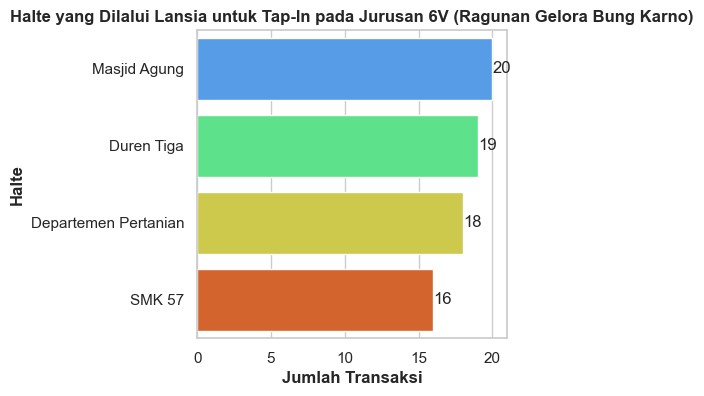

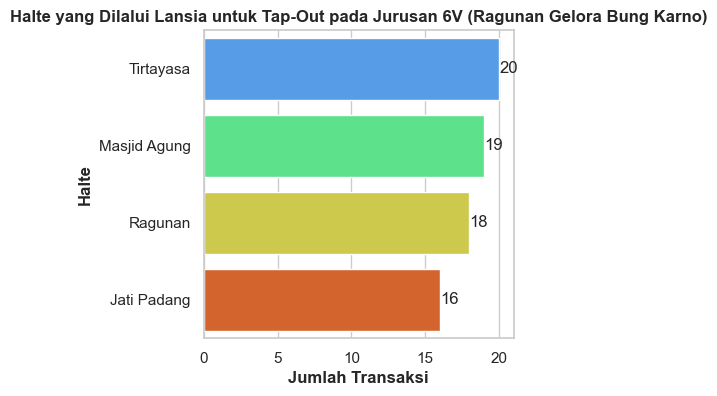

In [753]:
plt.figure(figsize=(4,4))

fx1 = sns.barplot(x=lansiaragunancountIn['Counts'], y=lansiaragunancountIn['tapInStopsName'],
                 palette=sns.color_palette("turbo", len(lansiaragunancountIn['Counts'])))

# Enumerate over the bars to add labels
for i, (count, stop) in enumerate(zip(lansiaragunancountIn['Counts'], lansiaragunancountIn['tapInStopsName'])):
    fx1.text(count, i, f'{count}', ha='left', va='center')

plt.title('Halte yang Dilalui Lansia untuk Tap-In pada Jurusan 6V (Ragunan Gelora Bung Karno)', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Halte', fontweight='bold')



plt.figure(figsize=(4,4))

fx2 = sns.barplot(x=lansiaragunancountOut['Counts'], y=lansiaragunancountOut['tapOutStopsName'],
                 palette=sns.color_palette("turbo", len(lansiaragunancountOut['Counts'])))

# Enumerate over the bars to add labels
for i, (count, stop) in enumerate(zip(lansiaragunancountOut['Counts'], lansiaragunancountOut['tapOutStopsName'])):
    fx2.text(count, i, f'{count}', ha='left', va='center')

plt.title('Halte yang Dilalui Lansia untuk Tap-Out pada Jurusan 6V (Ragunan Gelora Bung Karno)', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Halte', fontweight='bold')



Berdasarkan chart di atas, koridor yang sering digunakan lansia adalah Ragunan - Gelora Bung Karno (6V). Halte-halte yang dilewati koridor 6V dapat dijadikan pertimbangan untuk melayani lansia, dan dari hasil chart untuk Tap-In dan Tap-Out, Masjid Agung merupakan halte yang paling sering dikunjungi oleh Lansia.

#### **PEAK HOURS/JAM PUNCAK PADA HARI KERJA / WEEKDAY**


Selanjutnya akan dibuat dua tabel, yakni `weekday` yang mencakup transaksi yang terjadi pada hari Senin-Jumat (Monday-Friday) dan `weekend` yang mencakup hari Sabtu-Minggu (Saturday-Sunday). Selanjutnya untuk keduanya akan dibentuk line chart kronologis serta jumlah transaksi berdasarkan `tapInHour` dan `tapOutHour`, tapi ini akan diawali dengan tabel `weekday`.

In [754]:
weekday = tjclean[(tjclean['tapInDay']!='Saturday') & (tjclean['tapInDay']!='Sunday')]
weekday

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,Age,ageGroup,tapInHour,tapOutHour,tapInDay,tapOutDay,busType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,12.0,2023-04-03 06:00:53,3500.0,15,Remaja,5,6,Monday,Monday,Transjakarta
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,21.0,2023-04-03 06:40:01,3500.0,26,Dewasa,5,6,Monday,Monday,Transjakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,39.0,2023-04-03 06:50:55,3500.0,31,Dewasa,5,6,Monday,Monday,Transjakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,29.0,2023-04-03 06:28:16,3500.0,45,Dewasa,5,6,Monday,Monday,Transjakarta
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,15.0,2023-04-03 06:57:03,3500.0,41,Dewasa,6,6,Monday,Monday,Transjakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35215,ZXVG342K6T27GU,4475487986105118550,brizzi,"Tgk. Dipa Purnawati, S.E.I",F,2012,JAK.39,Kalimalang - Duren Sawit,0.0,B04489P,...,35.0,2023-04-14 13:15:25,0.0,11,Remaja,11,13,Friday,Friday,Jak-Lingko
35216,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,13.0,2023-04-21 19:55:49,3500.0,19,Dewasa,18,19,Friday,Friday,Transjakarta
35217,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2.0,2023-04-18 22:28:22,3500.0,49,Dewasa,21,22,Tuesday,Tuesday,Transjakarta
35218,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,14.0,2023-04-04 13:27:25,20000.0,47,Dewasa,10,13,Tuesday,Tuesday,RoyalTrans


In [755]:
## PEAK HOURS TAP-IN PADA HARI KERJA 

weekdayInpeakhours = weekday.groupby('tapInHour')['tapInHour'].value_counts()
pd.DataFrame(weekdayInpeakhours)

,count
tapInHour,
5,2911
6,5234
7,2402
8,2472
9,2438
10,96
11,130
12,112
13,124


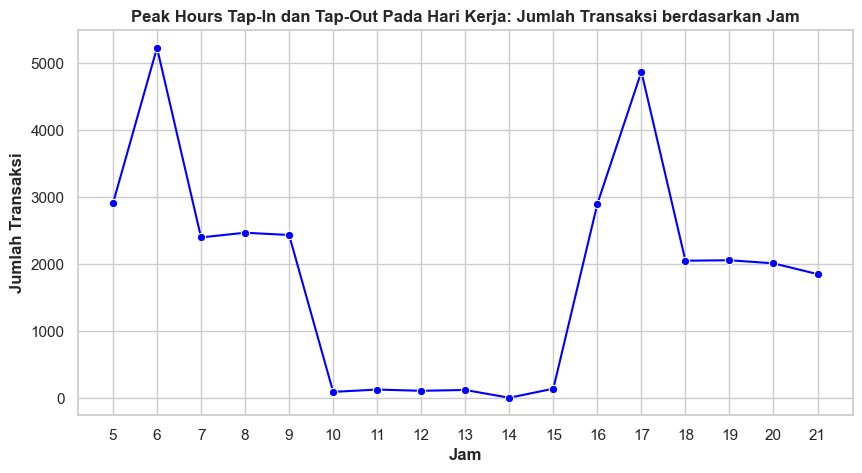

In [756]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.lineplot(x=weekdayInpeakhours.index, y=weekdayInpeakhours, marker='o', color='blue')
plt.title('Peak Hours Tap-In dan Tap-Out Pada Hari Kerja: Jumlah Transaksi berdasarkan Jam', fontweight='bold')
plt.xlabel('Jam', fontweight='bold')
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.ylabel('Jumlah Transaksi', fontweight='bold')
plt.show()


Insight yang dapat diambil dari grafik di atas: 
- Untuk hari kerja, Peak Hours terjadi pada jam 6 pagi serta 5 sore. Dapat disimpulkan jam-jam tersebut menandakan merupakan jam untuk berangkat serta pulang kerja. Alasan nilai yang rendah pada jam 10 pagi - 3 sore dikarenakan mayoritas orang masih dalam jam kerja.


In [757]:
weekday[weekday['tapOutHour']==0][['corridorID', 'corridorName', 'tapInStopsName', 'tapOutStopsName', 'tapOutTime']]

,corridorID,corridorName,tapInStopsName,tapOutStopsName,tapOutTime
34962,2E,Rusun Rawa Bebek - Kodamar,Gg. Sawo 1,Kayu Mas,2023-04-25 00:30:08


In [758]:
weekday['tapInTime'] = pd.to_datetime(weekday['tapInTime'])

C:\Users\Andreas Hoffman P\AppData\Local\Temp\ipykernel_2980\3775665041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday['tapInTime'] = pd.to_datetime(weekday['tapInTime'])


##### **KORIDOR PADA JAM SIBUK HARI KERJA**

Akan dibentuk grafik linechart jumlah transaksi berdasarkan jam sibuk pada jam 6 dan 17.


In [759]:
# weekday6 = weekday[weekday['tapInTime'].dt.hour==6]
# weekday17 = weekday[weekday['tapInTime'].dt.hour==17]

weekday6 = weekday[weekday['tapInTime'].dt.hour == 6]
weekday17 = weekday[weekday['tapInTime'].dt.hour == 17]

In [760]:
weekday['tapInTime'].dtypes

dtype('<M8[ns]')

In [761]:
weekday6corr = weekday6.groupby(['corridorID','corridorName']).size().reset_index(name='Counts').sort_values(ascending=False, by='Counts').head(10)
weekday6corr = weekday6corr.reset_index(drop='index')
weekday6corr

,corridorID,corridorName,Counts
0,JAK.06,Kampung Rambutan - Pondok Gede,61
1,1T,Cibubur - Balai Kota,61
2,8C,Kebayoran Lama - Tanah Abang,55
3,JAK.112,Terminal Tanah Merah - Pulo Gadung,53
4,9D,Pasar Minggu - Tanah Abang,52
5,JIS3,Harmoni - Jakarta International Stadium,51
6,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,51
7,2E,Rusun Rawa Bebek - Kodamar,49
8,5C,PGC - Juanda,48
9,6N,Ragunan - Blok M via Kemang,48


In [762]:
weekday17corr = weekday17.groupby(['corridorID', 'corridorName']).size().reset_index(name='Counts').sort_values(ascending=False, by='Counts').head(10)
weekday17corr = weekday17corr.reset_index(drop='index')
weekday17corr


,corridorID,corridorName,Counts
0,1T,Cibubur - Balai Kota,63
1,8C,Kebayoran Lama - Tanah Abang,61
2,9D,Pasar Minggu - Tanah Abang,61
3,1P,Senen - Blok M,50
4,2,Pulo Gadung - Monas,49
5,5C,PGC - Juanda,46
6,3C,Rusun Kapuk Muara - Penjaringan,45
7,6V,Ragunan - Gelora Bung Karno,45
8,14,Jakarta International Stadium - Senen,45
9,9N,Pinang Ranti - Pramuka,43


Text(0, 0.5, 'Halte')

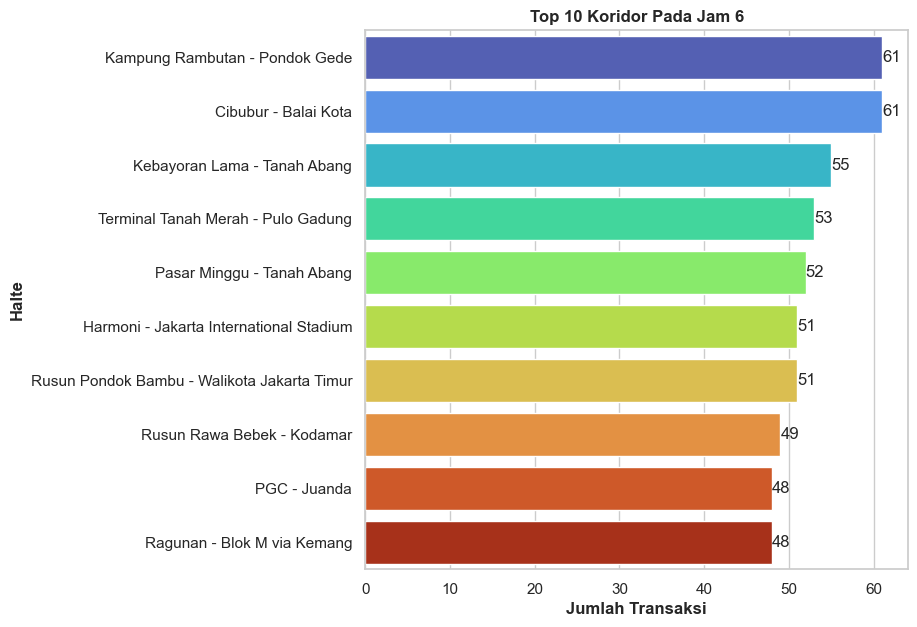

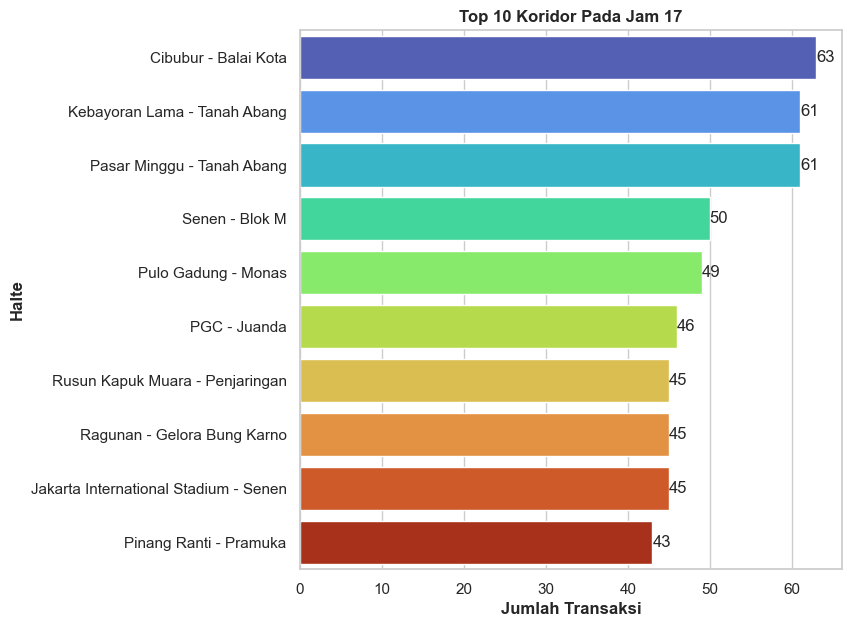

In [763]:
plt.figure(figsize=(7,7))

dx1 = sns.barplot(x=weekday6corr['Counts'], y=weekday6corr['corridorName'], 
                 palette=sns.color_palette("turbo", len(weekday6corr['Counts'])))


for i, (count, corridor) in enumerate(zip(weekday6corr['Counts'], weekday6corr['corridorName'])):
    dx1.text(count, i, f'{count}', ha='left', va='center')

plt.title('Top 10 Koridor Pada Jam 6', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Halte', fontweight='bold')



plt.figure(figsize=(7,7))

dx2 = sns.barplot(x=weekday17corr['Counts'], y=weekday17corr['corridorName'], 
                 palette=sns.color_palette("turbo", len(weekday17corr['Counts'])))


for i, (count, corridor) in enumerate(zip(weekday17corr['Counts'], weekday17corr['corridorName'])):
    dx2.text(count, i, f'{count}', ha='left', va='center')

plt.title('Top 10 Koridor Pada Jam 17', fontweight='bold')
plt.xlabel('Jumlah Transaksi', fontweight='bold')
plt.ylabel('Halte', fontweight='bold')

Dari dua bar chart di atas, diketahui bahwa terdapat sejumlah koridor yang paling ramai pada jam-jam sibuk, jam 6 dan jam 17: Cibubur - Balai Kota (1T), Kebayoran Lama - Tanah Abang (8C), Pasar Minggu - Tanah Abang (9D), PGC - Juanda (5C).

## **KESIMPULAN DAN REKOMENDASI**
### **KESIMPULAN**

Dari analisis serta visualisasi yang telah dilakukan, berikut merupakan kesimpulan yang dikumpulkan sebagai pertimbangan dalam meningkatkan kualitas pelayanan kepada pelanggan TransJakarta:

- Cibubur - Balai Kota (1T) dan Ciputat - CSW (S21) merupakan koridor yang paling banyak digunakan pada periode April 2023.
- Halte BKN dan Penjaringan merupakan halte dengan aktivitas tertinggi baik sebagai asal maupun tujuan.
- Wanita lebih sering menggunakan TransJakarta ketimbang Pria, dan terdapat lima koridor yang paling banyak digunakan Wanita: Koridor 9D (Pasar Minggu - Tanah Abang), T11 (Poris Plawad - Bundaran Senayan), 2E (Rusun Rawa Bebek - Kodamar), JAK.112 (Terminal Tanah Merah - Pulo Gadung) dan JAK.36 (Cilangkap - Cililitan).
- Lansia merupakan kelompok usia yang sering diabaikan dalam pelayanan TransJakarta, dan mereka paling aktif pada halte Masjid Agung untuk menaiki koridor Gelora Bung Karno (6V).
- Untuk hari kerja, jam sibuk terjadi pada jam 6 dan 17. Koridor yang ramai pada jam-jam demikian adalah Cibubur - Balai Kota (1T), Kebayoran Lama - Tanah Abang (8C), Pasar Minggu - Tanah Abang (9D), PGC - Juanda (5C).


### **REKOMENDASI / TINDAKAN**

Dari kesimpulan yang dijabarkan, berikut merupakan rekomendasi yang dapat dilakukan untuk meningkatkan kualitas pelayanan TransJakarta:

- Memberikan kursi sesuai jumlah pengunjung maksimal pada halte yang mempunyai aktivitas tinggi.
- Koridor yang digunakan Wanita dapat ditambahkan kursi khusus Wanita. Sebagai pilihan kedua, untuk mencegah perlakuan yang tidak semestinya, menambah armada khusus Wanita juga dapat dilakukan.
- Halte-halte yang dikunjungi oleh Lansia, khususnya Masjid Agung yang rutenya terlibat dalam jurusan 6V (Ragunan - Gelora Bung Karno) dapat diberikan lift khusus darurat serta eskalator berjalan secara dua arah untuk melayani Lansia, dan selebihnya fasilitas ini juga dapat diberikan untuk penyandang disabilitas.
- Penambahan armada pada koridor yang mempunyai aktivitas tertinggi pada jam-jam sibuk pada Cibubur - Balai Kota (1T), Kebayoran Lama - Tanah Abang (8C), Pasar Minggu - Tanah Abang (9D), PGC - Juanda (5C).